# CS-484: Intro to ML - Assignment 1

### Author: Jorge Gonzalez Lopez
### CWID: A20474413
### Semester: Spring 2021

In [1]:
# IMPORT LIBRARIES

In [434]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.linalg as sl
from sklearn.neighbors import KNeighborsClassifier


## Question 1

In [435]:
data = pd.read_csv('NormalSample.csv', delimiter=',')
print(data.head())

   i  group     x
0  0      1  29.8
1  1      1  33.3
2  2      0  30.9
3  3      1  32.2
4  4      0  31.1


In [436]:
print('a) Use the Pandas describe on the field x in the NormalSample.csv')
desc = data['x'].describe()
print(desc)

a) Use the Pandas describe on the field x in the NormalSample.csv
count    1001.000000
mean       31.414585
std         1.397672
min        26.300000
25%        30.400000
50%        31.500000
75%        32.400000
max        35.400000
Name: x, dtype: float64


In [437]:
print('b) Bin width recommended by the Izenman (1991) method')
h_iz = 2 * (desc['75%'] - desc['25%']) * (desc['count']**(-1/3))
h_iz = np.round(h_iz,decimals=1)
print(h_iz)

b) Bin width recommended by the Izenman (1991) method
0.4


In [438]:
def calcCD (Y, delta):
    maxY = np.max(Y)
    minY = np.min(Y)
    meanY = np.mean(Y)

   # Round the mean to integral multiples of delta
    middleY = delta * np.round(meanY / delta)

   # Determine the number of bins on both sides of the rounded mean
    nBinRight = np.ceil((maxY - middleY) / delta)
    nBinLeft = np.ceil((middleY - minY) / delta)
    lowY = middleY - nBinLeft * delta

   # Assign observations to bins starting from 0
    m = nBinLeft + nBinRight
    BIN_INDEX = 0;
    boundaryY = lowY
    for iBin in np.arange(m):
        boundaryY = boundaryY + delta
        BIN_INDEX = np.where(Y > boundaryY, iBin+1, BIN_INDEX)

   # Count the number of observations in each bins
    uBin, binFreq = np.unique(BIN_INDEX, return_counts = True)

   # Calculate the average frequency
    meanBinFreq = np.sum(binFreq) / m
    ssDevBinFreq = np.sum((binFreq - meanBinFreq)**2) / m
    CDelta = (2.0 * meanBinFreq - ssDevBinFreq) / (delta * delta)
    return(m, middleY, lowY, CDelta)


In [439]:
result = pd.DataFrame()
D = [0.1, 0.2, 0.5, 1, 2, 5]
for d in D:
    nBin, middleY, lowY, CDelta = calcCD(data['x'],d)
    highY = lowY + nBin * d
    result = result.append([[d, CDelta, lowY, middleY, highY, nBin]], ignore_index = True)

C_min = np.min(result[1])
idx  = np.where(result[1]==C_min)[0][0]    
print('b) Bin width recommended by the Shimazaki and Shinomoto (2007) method:')
print('The minimum C is: '+ str(np.round(C_min,decimals=2)) + ' and the bin width that minimizes C is: '+ str(D[idx]))



b) Bin width recommended by the Shimazaki and Shinomoto (2007) method:
The minimum C is: -9538.29 and the bin width that minimizes C is: 1


The midpoints are: [26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5]


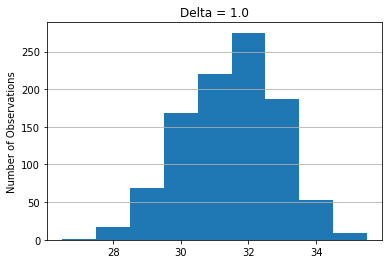

In [378]:
nBin, middleY, lowY, CDelta = calcCD(data['x'],D[idx])
highY = lowY + nBin * D[idx]
binMid = lowY + 0.5 * D[idx] + np.arange(nBin) * D[idx]
plt.hist(data['x'], bins = binMid, align='mid')
plt.title('Delta = ' + str(D[idx]))
plt.ylabel('Number of Observations')
plt.grid(axis = 'y')

print('The midpoints are: ' + str(binMid))
plt.show()

## Question 2

In [155]:
print(data.head())

,i,group,x
0,0,1,29.8
1,1,1,33.3
2,2,0,30.9
3,3,1,32.2
4,4,0,31.1


In [164]:
data_g0 = data[data['group'] == 0]['x']
data_g1 = data[data['group'] == 1]['x']

IQR_g0 = np.percentile(data_g0,75) -  np.percentile(data_g0,25)
IQR_g1 = np.percentile(data_g1,75) -  np.percentile(data_g1,25)

lower_whisker_g0 =  np.percentile(data_g0,25) - 1.5 * IQR_g0
upper_whisker_g0 =  np.percentile(data_g0,75) + 1.5 * IQR_g0

lower_whisker_g1 =  np.percentile(data_g1,25) - 1.5 * IQR_g1
upper_whisker_g1 =  np.percentile(data_g1,75) + 1.5 * IQR_g1

print('a) The five-number summary of x for each category of the group is: ')
print('group = 0 -> Min: ' + str(min(data_g0)) + ', Q1: ' + str(np.percentile(data_g0,25)) + ', Q2: ' + str(np.percentile(data_g0,50)) + ', Q3: ' + str(np.percentile(data_g0,75)) + ' and max: ' + str(max(data_g0)))
print('group = 1 -> Min: ' + str(min(data_g1)) + ', Q1: ' + str(np.percentile(data_g1,25)) + ', Q2: ' + str(np.percentile(data_g1,50)) + ', Q3: ' + str(np.percentile(data_g1,75)) + ' and max: ' + str(max(data_g1)))

print('\nAnd the values of the 1.5 IQR whiskers are: ')
print('group = 0 -> lower whisker = ' + str(np.round(lower_whisker_g0,decimals = 2)) + ' and the upper whisker: ' + str(np.round(upper_whisker_g0, decimals=2)))
print('group = 1 -> lower whisker = ' + str(np.round(lower_whisker_g1,decimals = 2)) + ' and the upper whisker: ' + str(np.round(upper_whisker_g1, decimals=2)))


a) The five-number summary of x for each category of the group is: 
group = 0 -> Min: 26.3, Q1: 29.4, Q2: 30.0, Q3: 30.6 and max: 32.2
group = 1 -> Min: 29.1, Q1: 31.4, Q2: 32.1, Q3: 32.7 and max: 35.4

And the values of the 1.5 IQR whiskers are: 
group = 0 -> lower whisker = 27.6 and the upper whisker: 32.4
group = 1 -> lower whisker = 29.45 and the upper whisker: 34.65


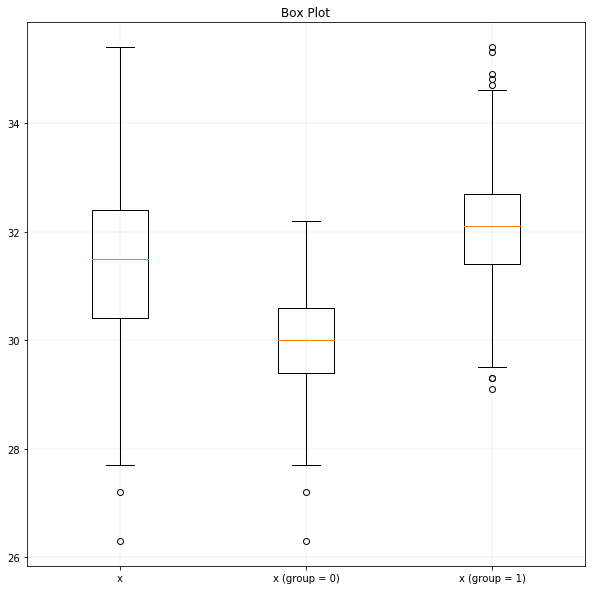

In [170]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Box Plot')
ax.boxplot([data['x'], data_g0, data_g1], labels = ['x', 'x (group = 0)', 'x (group = 1)'])
ax.grid(linestyle = '--', linewidth = 0.25)
plt.show()

In [179]:
data_g = data['x']

IQR_g = np.percentile(data_g,75) -  np.percentile(data_g,25)

lower_whisker_g =  np.percentile(data_g,25) - 1.5 * IQR_g
upper_whisker_g =  np.percentile(data_g,75) + 1.5 * IQR_g

print('The five-number summary of x: ')
print('Min: ' + str(min(data_g)) + ', Q1: ' + str(np.percentile(data_g,25)) + ', Q2: ' + str(np.percentile(data_g,50)) + ', Q3: ' + str(np.percentile(data_g,75)) + ' and max: ' + str(max(data_g)))


print('\nOutliers of x for the entire data:')
print(data_g[(data_g < lower_whisker_g) | (data_g > upper_whisker_g)])

print('\nOutliers of x for the group = 0:')
print(data_g0[(data_g0 < lower_whisker_g0) | (data_g0 > upper_whisker_g0)])


print('\nOutliers of x for the group = 1:')
print(data_g1[(data_g1 < lower_whisker_g1) | (data_g1 > upper_whisker_g1)])



The five-number summary of x: 
Min: 26.3, Q1: 30.4, Q2: 31.5, Q3: 32.4 and max: 35.4

Outliers of x for the entire data:
70     27.2
295    26.3
Name: x, dtype: float64

Outliers of x for the group = 0:
70     27.2
295    26.3
Name: x, dtype: float64

Outliers of x for the group = 1:
30     35.3
107    29.3
297    35.4
812    34.9
846    34.7
907    34.8
938    29.3
975    29.1
Name: x, dtype: float64


## Question 3

In [347]:
df = pd.read_csv('fraud.csv', delimiter=',')
df.head()

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1


In [348]:
t = df['FRAUD'].value_counts(normalize = True)
print('a) ' + str(np.round(t[1]*100, decimals=4)) + ' % of the investigations are a fraud')

a) 19.9497 % of the investigations are a fraud


In [349]:
df_inter = df[['TOTAL_SPEND','DOCTOR_VISITS','NUM_CLAIMS','MEMBER_DURATION', 'OPTOM_PRESC','NUM_MEMBERS']]
df_inter.head()

,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1100,11,0,94,1,2
1,1300,7,2,122,0,1
2,1500,4,0,149,1,3
3,1500,9,0,180,1,1
4,1700,3,0,93,0,1


In [350]:
matrix = np.matrix(df_inter)

xtx = np.dot(matrix.T,matrix)

evals, evecs = np.linalg.eigh(xtx)

print("Eigenvalues of x = \n", evals)

evals_1 = evals[evals > 1.0]
evecs_1 = evecs[:,evals > 1.0]

print("Eigenvalues of x gretaer than one = \n", evals_1)

Eigenvalues of x = 
 [6.84728061e+03 8.38798104e+03 1.80639631e+04 3.15839942e+05
 8.44539131e+07 2.81233324e+12]
Eigenvalues of x gretaer than one = 
 [6.84728061e+03 8.38798104e+03 1.80639631e+04 3.15839942e+05
 8.44539131e+07 2.81233324e+12]


In [351]:
dvals = 1.0 / np.sqrt(evals_1)
transf = evecs_1 * np.diagflat(dvals)
print("Transformation Matrix = \n", transf)

Transformation Matrix = 
 [[-6.49862374e-08 -2.41194689e-07  2.69941036e-07 -2.42525871e-07
  -7.90492750e-07  5.96286732e-07]
 [ 7.31656633e-05 -2.94741983e-04  9.48855536e-05  1.77761538e-03
   3.51604254e-06  2.20559915e-10]
 [-1.18697179e-02  1.70828329e-03 -7.68683456e-04  2.03673350e-05
   1.76401304e-07  9.09938972e-12]
 [ 1.92524315e-06 -5.37085514e-05  2.32038406e-05 -5.78327741e-05
   1.08753133e-04  4.32672436e-09]
 [ 8.34989734e-04 -2.29964514e-03 -7.25509934e-03  1.11508242e-05
   2.39238772e-07  2.85768709e-11]
 [ 2.10964750e-03  1.05319439e-02 -1.45669326e-03  4.85837631e-05
   6.76601477e-07  4.66565230e-11]]


In [352]:
transf_matrix = matrix * transf
print("The Transformed x = \n", transf_matrix)

# Check columns of transformed X
xtx = transf_matrix.T * transf_matrix
print("Expect an Identity Matrix = \n", xtx)


The Transformed x = 
 [[ 5.96859502e-03  1.02081629e-02 -6.64664861e-03  1.39590283e-02
   9.39352141e-03  6.56324665e-04]
 [-2.09672310e-02  5.01932025e-03  8.51930607e-04  5.16174400e-03
   1.22658834e-02  7.75702220e-04]
 [ 7.64597676e-03  1.97528525e-02 -7.38335310e-03 -1.71350853e-03
   1.50348109e-02  8.95075830e-04]
 ...
 [-7.18408819e-05 -1.62580211e-02  2.75078514e-02 -7.13245766e-03
  -4.74021952e-02  5.31896971e-02]
 [-1.80147801e-04 -1.62154130e-02  2.76213381e-02 -9.17125411e-03
  -4.76625006e-02  5.35474776e-02]
 [-2.21157680e-03 -2.73884697e-02  2.93391341e-02 -7.81347172e-03
  -4.70861917e-02  5.36071324e-02]]
Expect an Identity Matrix = 
 [[ 1.00000000e+00 -3.00432422e-16 -4.61219604e-16  5.45323877e-15
   1.20996962e-15 -1.28911638e-16]
 [-3.00432422e-16  1.00000000e+00 -6.44449771e-16 -2.76820667e-14
  -1.23512311e-15  7.78890841e-16]
 [-4.61219604e-16 -6.44449771e-16  1.00000000e+00  3.49546780e-15
   1.21430643e-16 -2.39391840e-16]
 [ 5.45323877e-15 -2.76820667e-14

In [353]:
Y = df['FRAUD']
X = transf_matrix

model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

res = model.fit(X,Y)
preds = res.predict(X)

print(res.score(X,Y))


0.8778523489932886


In [354]:
x = np.matrix([7500, 15, 3,127,2,2])

print(x)

x_t = x * transf

print(x_t)

[[7500   15    3  127    2    2]]
[[-0.02886529  0.00853837 -0.01333491  0.0176811   0.00793805  0.0044727 ]]


In [355]:
n_5 = model.kneighbors(x_t,return_distance=False)
print(n_5)

[[ 588 2897 1199 1246  886]]


In [356]:
df.iloc[n_5[0]]

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
588,589,1,7500,15,3,127,2,2
2897,2898,1,16000,18,3,146,3,2
1199,1200,1,10000,16,3,124,2,1
1246,1247,1,10200,13,3,119,2,3
886,887,1,8900,22,3,166,1,2


In [379]:
x_f  = res.predict_proba(x_t)

print(x_f)
print('The predicted value is of FRAUD with a probability of: ' + str(x_f[0][1]*100) + '%')

[[0. 1.]]
The predicted value is of FRAUD with a probability of: 100.0%


## Question 4

In [266]:
d_a = pd.read_csv('airplanes.csv', delimiter = ';')
d_a = d_a.fillna('___')
d_a

,Flight,Carrier 1,Carrier 2,Airport 1,Airport 2,Airport 3,Airport 4
0,A,American,Cathay Pacific,ORD,LAX,HKG,PVG
1,B,American,Cathay Pacific,ORD,SFO,HKG,PVG
2,C,American,China Southern,ORD,LAX,CAN,PVG
3,D,American,Virgin Atlantic,ORD,LHR,___,PVG
4,E,British Airways,Virgin Atlantic,ORD,LHR,___,PVG
5,F,Delta,___,ORD,SEA,ICN,PVG
6,G,United,Austrian,ORD,LHR,VIE,PVG
7,H,United,Virgin Atlantic,ORD,LHR,___,PVG
8,I,United,___,ORD,DCA,EWR,PVG
9,J,United,___,ORD,DEN,LAX,PVG


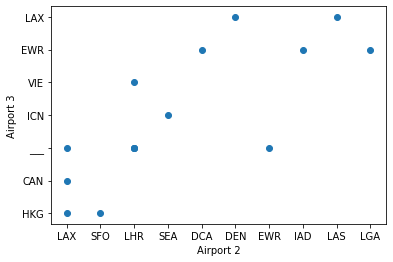

In [268]:
plt.scatter(d_a['Airport 2'], d_a['Airport 3'])
plt.xlabel('Airport 2')
plt.ylabel('Airport 3')
plt.show()

In [364]:
d_air = d_a[['Airport 2','Airport 3']]
d_23 = pd.concat([d_air['Airport 2'], d_air['Airport 3']])
freq_tab = d_23.value_counts()
print(freq_tab)

LAX    5
___    5
LHR    4
EWR    4
HKG    2
SFO    1
VIE    1
IAD    1
LAS    1
LGA    1
DEN    1
SEA    1
CAN    1
DCA    1
ICN    1
dtype: int64


In [382]:
new_f = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1]

In [383]:
cos_dis = []
Airports = ['LAX','___', 'LHR', 'EWR','HKG','SFO','VIE','IAD','LAS','LGA','DEN','SEA','CAN','DCA','ICN']
for i in range(len(d_air)):
    flight = np.zeros(len(freq_tab))
    flight_airports= d_air.iloc[i]
    flight[Airports.index(flight_airports['Airport 2'])]=1
    flight[Airports.index(flight_airports['Airport 3'])]=1
    cosine_distance = 1 -  np.inner(flight, new_f) / (np.linalg.norm(new_f) * np.linalg.norm(flight))
    cos_dis.append(cosine_distance)
print(np.round(cos_dis,decimals=2))

[0.5 1.  0.5 1.  1.  0.5 1.  1.  1.  0.5 1.  1.  0.5 0.5 1. ]


In [393]:
print(d_a.iloc[np.where(cos_dis == min(cos_dis))])

   Flight Carrier 1       Carrier 2 Airport 1 Airport 2 Airport 3 Airport 4
0       A  American  Cathay Pacific       ORD       LAX       HKG       PVG
2       C  American  China Southern       ORD       LAX       CAN       PVG
5       F     Delta             ___       ORD       SEA       ICN       PVG
9       J    United             ___       ORD       DEN       LAX       PVG
12      M    United             ___       ORD       LAS       LAX       PVG
13      N    United             ___       ORD       LAX       ___       PVG


In [433]:
def question3 (df):
    '''
         Parameter
          df: Pandas dataframe

     '''
    t = df['FRAUD'].value_counts(normalize = True)
    print('a) ' + str(np.round(t[1]*100, decimals=4)) + ' % of the investigations are a fraud')

    df_inter = df[['TOTAL_SPEND','DOCTOR_VISITS','NUM_CLAIMS','MEMBER_DURATION', 'OPTOM_PRESC','NUM_MEMBERS']]
    matrix = np.matrix(df_inter)

    xtx = np.dot(matrix.T,matrix)

    evals, evecs = np.linalg.eigh(xtx)
    print("Eigenvalues of x = \n", evals)

    evals_1 = evals[evals > 1.0]
    evecs_1 = evecs[:,evals > 1.0]

    print("Eigenvalues of x gretaer than one = \n", evals_1)

    dvals = 1.0 / np.sqrt(evals_1)
    transf = evecs_1 * np.diagflat(dvals)
    print("Transformation Matrix = \n", transf)

    transf_matrix = matrix * transf
    print("The Transformed x = \n", transf_matrix)

    # Check columns of transformed X
    xtx = transf_matrix.T * transf_matrix
    print("Expect an Identity Matrix = \n", xtx)

    Y = df['FRAUD']
    X = transf_matrix

    model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')

    res = model.fit(X,Y)
    preds = res.predict(X)
    print('c) The socre function returns the value: ')
    print(res.score(X,Y))

    x = np.matrix([7500, 15, 3,127,2,2])
    x_t = x * transf

    print(x_t)

    n_5 = model.kneighbors(x_t,return_distance=False)
    print(n_5)
    print(df.iloc[n_5[0]])

    x_f  = res.predict_proba(x_t)

    print(x_f)
    print('The predicted value is of FRAUD with a probability of: ' + str(x_f[0][1]*100) + '%')
